The MIT License (MIT)<br>
Copyright (c) 2018 Massachusetts Institute of Technology<br>

Authors: Cody Rude, Victor Pankratius<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

## Plot all Kepler Exoplanet Light Curve Time Series (~2000)
Y-axis: Pre-search Data Conditioning Simple Aperture Photometry Flux <br>
https://keplerscience.arc.nasa.gov/pipeline.html#pre-search-data-conditioning-pdc <br>
X-axis: Time <br>
Source: http://keplerscience.arc.nasa.gov <br>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [3]:
import pandas as pd

In [5]:
from skdaccess.astro.kepler import DataFetcher as Kepler_DF
from skdaccess.utilities.kepler_util import normalize
from skdaccess.framework.param_class import *
import numpy as np

List of stars with known exoplanets (One star with a kepler ID can occur multiple times with different planets)

In [6]:
kepler_planets = pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=keplernames")

Specify the number of light curves to plot and the number of plot columns in the array plot

In [46]:
number_of_lightcurves = 30
number_of_columns = 10

Extract the kepid column, remove duplicate entries using set, convert back to list in order to sort and slice the list. <br>
Convert to AutoList for the data fetcher

In [30]:
kepler_list = list(set(kepler_planets.kepid.tolist()))
kepler_list.sort()
exoplanet_ids = AutoList(kepler_list[:number_of_lightcurves])

Create the data fetcher

In [32]:
kepler_fetcher = Kepler_DF([exoplanet_ids])

Fetch the data and time the execution

In [33]:
%time kepler_dw = kepler_fetcher.output()

CPU times: user 23.9 s, sys: 555 ms, total: 24.4 s
Wall time: 48.5 s


Array plotting routine for all the time series with Pre-search Data Conditioning Simple Aperture Photometry Flux (PDCSAP_FLUX) preprocessing <br>
https://keplerscience.arc.nasa.gov/pipeline.html#pre-search-data-conditioning-pdc

In [42]:
def plotAllKeplerPDCSAP_TimeSeries(dw, number_of_columns):
    plt.rc('font', size=2)
    number_of_rows = np.ceil(number_of_lightcurves/number_of_columns)
    plt.gcf().set_size_inches(0.8*number_of_columns,0.75*number_of_rows)
    for index, (label, data) in enumerate(dw.getIterator()):
        plt.subplot(number_of_rows, number_of_columns, index+1)
        plt.title(label, fontsize=6);
        plt.plot(np.array(data['TIME']), data['PDCSAP_FLUX'],'.', markersize=0.1);
        plt.xlim(0,1800)
    plt.tight_layout()

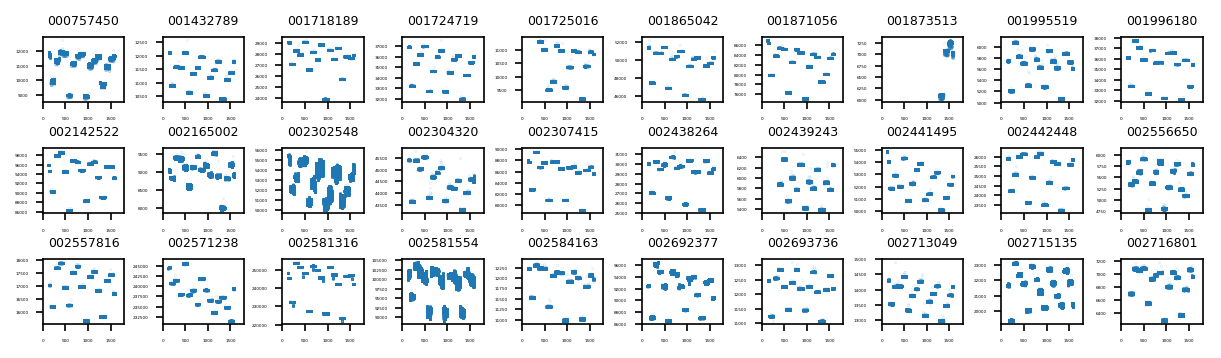

In [47]:
plotAllKeplerPDCSAP_TimeSeries(kepler_dw, number_of_columns)